In [83]:
import pandas as pd

# load in the LSTM_results.csv file
LSTM_results = pd.read_csv('LSTM_results_optimal.csv', index_col=0)

# rename the columns
LSTM_results.columns = ['Optimal Tickers', 'Optimal Weights', 'Estimated Return', 'Estimated Risk']

In [84]:
LSTM_results

,Optimal Tickers,Optimal Weights,Estimated Return,Estimated Risk
Date,,,,
2019-10-01,"['IRM', 'IPG', 'COO', 'WM', 'MDT', 'HII', 'JKH...",[0.33969453 0.16822376 0.12603053 0.09589508 0...,1.513563,0.084867
2019-10-02,"['ETSY', 'TSLA', 'ABBV', 'GL', 'LYV', 'PCAR', ...",[0.33316362 0.16573075 0.13607343 0.10815034 0...,2.150309,0.115368
2019-10-03,"['IRM', 'XEL', 'LYV', 'CTLT', 'FMC', 'RF', 'EO...",[0.29734248 0.18680777 0.12658989 0.09026261 0...,1.599994,0.093689
2019-10-04,"['KR', 'KDP', 'GE', 'CAG', 'EA', 'EIX', 'ISRG'...",[0.30037199 0.21630163 0.19161101 0.08042997 0...,1.209262,0.063209
2019-10-07,"['LYB', 'COP', 'VFC', 'KDP', 'FANG', 'ZBRA', '...",[0.46614186 0.1440168 0.11850933 0.08664709 0...,1.220697,0.079940
...,...,...,...,...
2019-12-23,"['HSIC', 'SYK', 'GOOGL', 'PCAR', 'RF', 'TXN', ...",[0.26961137 0.23234462 0.16912813 0.0879169 0...,1.862451,0.109088
2019-12-24,"['IRM', 'RF', 'FDX', 'KDP', 'MMC', 'HST', 'POD...",[0.39085903 0.19106064 0.1554404 0.13600795 0...,1.813370,0.096368
2019-12-26,"['RF', 'PODD', 'ABBV', 'HON', 'NXPI', 'ENPH', ...",[0.27114001 0.19328535 0.18747699 0.13603739 0...,1.906068,0.125994


In [85]:
def parse_weights_string(weights_str):
    weights_str = weights_str.replace("[", "").replace("]", "").replace("\r\n", "").replace(",", " ").strip()  # Remove unwanted characters
    weights_list = [float(w) for w in weights_str.split()]  # Split and convert elements to float
    return weights_list

In [86]:
# for each day in the LSTM_results dataframe, parse the weights string and add it to the dataframe
for i in range(len(LSTM_results)):
    LSTM_results['Optimal Weights'][i] = parse_weights_string(LSTM_results['Optimal Weights'][i])

C:\Users\nicol\AppData\Local\Temp\ipykernel_1388\3074252842.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LSTM_results['Optimal Weights'][i] = parse_weights_string(LSTM_results['Optimal Weights'][i])


In [105]:
# make the index to be the date
LSTM_results.index = pd.to_datetime(LSTM_results.index)

In [96]:
optimal_weights_dict = {}

# Iterate over each row in LSTM_results
for date, row in LSTM_results.iterrows():
    # Extract the optimal tickers and their corresponding weights
    tickers = eval(row['Optimal Tickers'])
    weights = row['Optimal Weights']
    
    # Check if the length of tickers matches the length of weights
    if len(tickers) != len(weights):
        print(f"Error: Length of tickers ({len(tickers)}) does not match the length of weights ({len(weights)})")
        continue
    
    # Create a dictionary entry with tickers as keys and weights as values
    optimal_weights_dict[date] = dict(zip(tickers, weights))

# Print the optimal weights dictionary
print(optimal_weights_dict)


{'2019-10-01': {'IRM': 0.33969453, 'IPG': 0.16822376, 'COO': 0.12603053, 'WM': 0.09589508, 'MDT': 0.08618871, 'HII': 0.07970559, 'JKHY': 0.04412054, 'EXPE': 0.03259491, 'INCY': 0.02341017, 'DPZ': 0.00413618}, '2019-10-02': {'ETSY': 0.33316362, 'TSLA': 0.16573075, 'ABBV': 0.13607343, 'GL': 0.10815034, 'LYV': 0.09838997, 'PCAR': 0.07303465, 'DISH': 0.06160709, 'ZTS': 0.01782864, 'OMC': 0.00544515, 'TRGP': 0.00057635}, '2019-10-03': {'IRM': 0.29734248, 'XEL': 0.18680777, 'LYV': 0.12658989, 'CTLT': 0.09026261, 'FMC': 0.08249987, 'RF': 0.07701709, 'EOG': 0.05940602, 'VTRS': 0.03428343, 'CRL': 0.02643307, 'CAH': 0.01935778}, '2019-10-04': {'KR': 0.30037199, 'KDP': 0.21630163, 'GE': 0.19161101, 'CAG': 0.08042997, 'EA': 0.07660483, 'EIX': 0.04914575, 'ISRG': 0.03425118, 'IBM': 0.01966316, 'IFF': 0.01793401, 'MAA': 0.01368647}, '2019-10-07': {'LYB': 0.46614186, 'COP': 0.1440168, 'VFC': 0.11850933, 'KDP': 0.08664709, 'FANG': 0.07301056, 'ZBRA': 0.04314885, 'LOW': 0.03956177, 'SEDG': 0.01753416, 

In [108]:
# obtain 63-day price movement for each ticker
stock_data = pd.read_csv('SP500_stock_prices.csv')
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data = stock_data[stock_data['Date'] >= '2019-10-01']
stock_data = stock_data[stock_data['Date'] <= '2020-04-02']
stock_data = stock_data[['Date', 'Ticker', 'Close']]
# Make Date the index
stock_data = stock_data.set_index('Date')
# make the index to be the date
stock_data.index = pd.to_datetime(stock_data.index)

# Calculate returns over 63 business days
# select only the ticker index
indiviual_datas = []

for ticker in stock_data['Ticker'].unique():
    #data_ticker = data.xs(0, level=1).copy()
    data_ticker = stock_data[stock_data['Ticker'] == ticker].copy()
    # make target column
    data_ticker['63-day Price Movement'] = data_ticker['Close'].pct_change(63).shift(-63)
    data_ticker.dropna(inplace=True)
    data_ticker

    indiviual_datas.append(data_ticker)

data_all_tickers = pd.concat(indiviual_datas)
data_all_tickers

,Ticker,Close,63-day Price Movement
Date,,,
2019-10-01,MMM,158.380005,0.113903
2019-10-02,MMM,155.649994,0.156441
2019-10-03,MMM,155.229996,0.149584
2019-10-04,MMM,155.820007,0.146323
2019-10-07,MMM,153.520004,0.158807
...,...,...,...
2019-12-24,ZTS,132.919998,-0.112925
2019-12-26,ZTS,133.029999,-0.159814
2019-12-27,ZTS,133.250000,-0.124353


In [109]:
# use the optimal_weights_dict to extract the 63-day Price Movement for each ticker on each day
# create a new df called stock_returns
stock_returns = pd.DataFrame()

# iterate over each date in optimal_weights_dict
for date, weights in optimal_weights_dict.items():
    # extract the 63-day Price Movement for each ticker on that day
    date_returns = data_all_tickers.loc[date].copy()
    # add the weights to the dataframe
    date_returns['Weight'] = date_returns['Ticker'].map(weights)
    # append the date_returns dataframe to stock_returns
    stock_returns = stock_returns.append(date_returns)

In [111]:
# Make a new column called 'Weighted Returns'
stock_returns['Weighted Returns'] = stock_returns['Weight'] * stock_returns['63-day Price Movement']
# remove all rows with NaN values
stock_returns.dropna(inplace=True)
stock_returns

,Ticker,Close,63-day Price Movement,Weight,Weighted Returns
Date,,,,,
2019-10-01,COO,292.839996,0.097152,0.126031,0.012244
2019-10-01,DPZ,245.770004,0.195345,0.004136,0.000808
2019-10-01,EXPE,133.910004,-0.192443,0.032595,-0.006273
2019-10-01,HII,206.470001,0.215092,0.079706,0.017144
2019-10-01,INCY,73.959999,0.180638,0.023410,0.004229
...,...,...,...,...,...
2019-12-30,IRM,31.690001,-0.248974,0.417323,-0.103903
2019-12-30,JNPR,24.500000,-0.218776,0.019318,-0.004226
2019-12-30,MAS,48.090000,-0.281140,0.002371,-0.000667


In [114]:
# make a new dictionary called portfolio_returns_dict to store the portfolio returns for each day
portfolio_returns_dict = {}

# Iterate over each row in stock_returns
for date, row in stock_returns.iterrows():
    # Extract the weighted returns
    weighted_returns = row['Weighted Returns']
    
    # Check if the date already exists in the dictionary
    if date in portfolio_returns_dict:
        # If it does, add the weighted returns to the existing value
        portfolio_returns_dict[date] += weighted_returns
    else:
        # If it doesn't, set the weighted returns as the value
        portfolio_returns_dict[date] = weighted_returns
        

In [116]:
# make a new column in LSTM_results called 'Actual Returns'
LSTM_results['Actual Returns'] = LSTM_results.index.map(portfolio_returns_dict)

In [127]:
# multiply the 'Actual Returns', Estimated Return and Estimated Risk columns by 100
LSTM_results['Actual Returns'] = LSTM_results['Actual Returns'] * 100
LSTM_results['Estimated Return'] = LSTM_results['Estimated Return'] * 100
LSTM_results['Estimated Risk'] = LSTM_results['Estimated Risk'] * 100
# Rename the columns
LSTM_results.columns = ['Optimal Tickers', 'Optimal Weights', 'Estimated Return (%)', 'Estimated Risk (%)', 'Actual Return (%)']
LSTM_results

,Optimal Tickers,Optimal Weights,Estimated Return (%),Estimated Risk (%),Actual Return (%)
Date,,,,,
2019-10-01,"['IRM', 'IPG', 'COO', 'WM', 'MDT', 'HII', 'JKH...","[0.33969453, 0.16822376, 0.12603053, 0.0958950...",151.356286,8.486670,4.145286
2019-10-02,"['ETSY', 'TSLA', 'ABBV', 'GL', 'LYV', 'PCAR', ...","[0.33316362, 0.16573075, 0.13607343, 0.1081503...",215.030890,11.536799,15.094820
2019-10-03,"['IRM', 'XEL', 'LYV', 'CTLT', 'FMC', 'RF', 'EO...","[0.29734248, 0.18680777, 0.12658989, 0.0902626...",159.999449,9.368916,4.548145
2019-10-04,"['KR', 'KDP', 'GE', 'CAG', 'EA', 'EIX', 'ISRG'...","[0.30037199, 0.21630163, 0.19161101, 0.0804299...",120.926206,6.320885,16.646027
2019-10-07,"['LYB', 'COP', 'VFC', 'KDP', 'FANG', 'ZBRA', '...","[0.46614186, 0.1440168, 0.11850933, 0.08664709...",122.069696,7.994035,11.714708
...,...,...,...,...,...
2019-12-23,"['HSIC', 'SYK', 'GOOGL', 'PCAR', 'RF', 'TXN', ...","[0.26961137, 0.23234462, 0.16912813, 0.0879169...",186.245112,10.908834,-24.976109
2019-12-24,"['IRM', 'RF', 'FDX', 'KDP', 'MMC', 'HST', 'POD...","[0.39085903, 0.19106064, 0.1554404, 0.13600795...",181.336991,9.636830,-22.691779
2019-12-26,"['RF', 'PODD', 'ABBV', 'HON', 'NXPI', 'ENPH', ...","[0.27114001, 0.19328535, 0.18747699, 0.1360373...",190.606775,12.599439,-21.608369


In [126]:
# save the LSTM_results dataframe to a csv file
LSTM_results.to_csv('LSTM_results_optimal.csv')

In [122]:
# calculate the average and standard deviation of the 'Actual Returns' column and print them
print(f"Average Return: {LSTM_results['Actual Returns'].mean()*100}%")
print(f"Standard Deviation of Return: {LSTM_results['Actual Returns'].std()*100}")

Average Return: -2.2834137628309517%
Standard Deviation of Return: 14.653824785564632


<Axes: title={'center': 'Actual Returns vs Estimated Returns'}, xlabel='Date'>

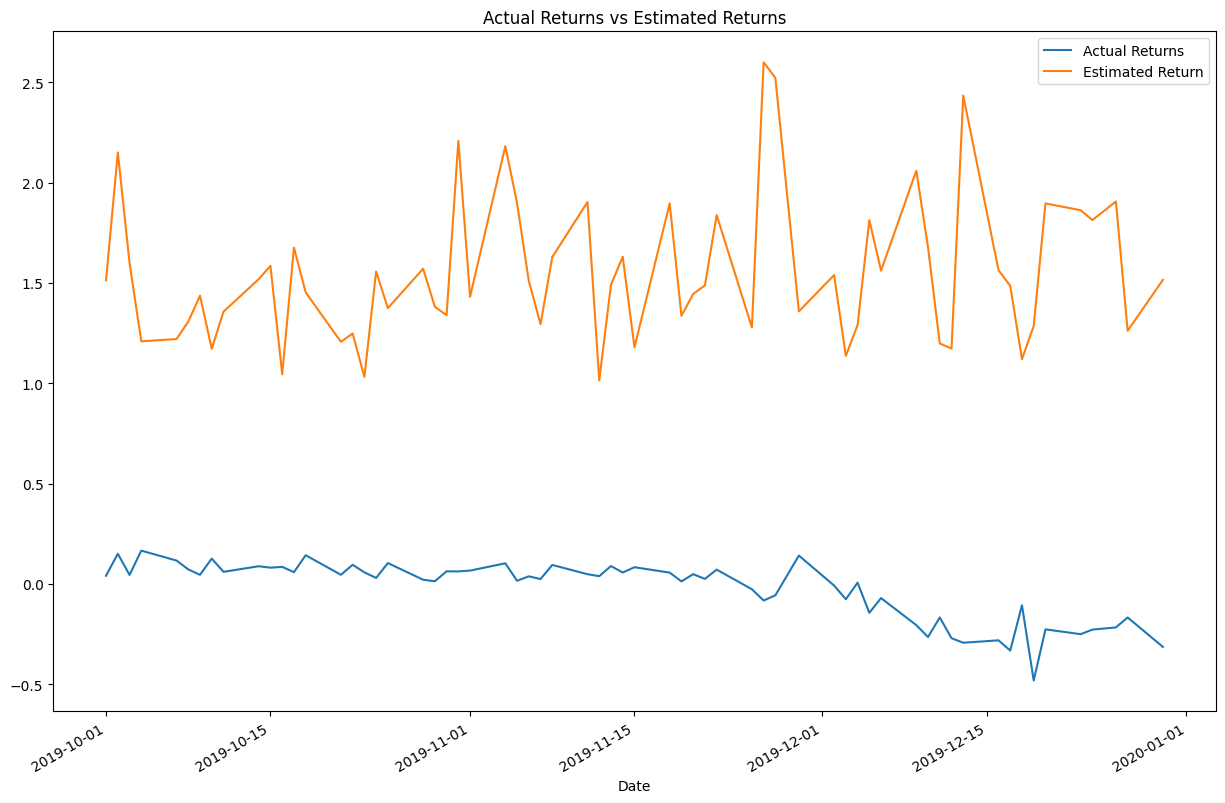

In [125]:
# plot actual returns vs estimated returns
LSTM_results.plot(y = ['Actual Returns', 'Estimated Return'], figsize=(15, 10), title='Actual Returns vs Estimated Returns')